<a href="https://colab.research.google.com/github/iamharkirat/EDA/blob/main/learning_enterprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,8
asu_colors=['#FFC627', '#8C1D40', '#000000', '#FFFFFF']
sns.set_palette(asu_colors)

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

color='#8C1D40'
color_2='#FFC627'
dark_palette=sns.dark_palette(color, 10, reverse=True)
dark_palette_2=sns.dark_palette(color_2, 10, reverse=True)

In [2]:
# load data
df=pd.read_csv('/content/Data Reporter Assignment.csv')
df.head()

,Student,Partner,Course Prefix,Term,Course Start Date,Course End Date,Number of Credits,Course Enrollment,Enrollment Date,Enrollment Mode,Verified Date,Grade,Final Grade,Credit Eligible,Credit Converted,Date Added To Transcript
0,student-03-221,Acorn College,ENG 102,2201B,3/17/20,5/22/20,3,CE-109-71,12/15/19,credit,12/20/19,100.0,A,Y,Y,5/17/20
1,student-87-161,Advanced Youth Initiative,AST 111,2201A,1/14/20,3/25/20,4,CE-852-75,1/23/20,credit,1/23/20,100.0,A,Y,Y,4/15/20
2,student-14-224,Acorn College,ENG 102,2201B,3/17/20,5/22/20,3,CE-476-72,12/28/19,credit,12/27/19,100.0,A,Y,Y,5/17/20
3,student-18-260,Acorn College,HST 102,2207B,10/13/20,12/9/20,3,CE-442-120,8/12/20,verified,8/12/20,100.0,A,Y,NaN,NaN
4,student-36-195,Lucerne Corp,SOC 101,2204A,4/14/20,6/19/20,3,CE-286-89,4/14/20,credit,4/20/20,100.0,A,Y,Y,6/7/20


In [3]:
# convert date columns to datetime format
date_columns = ['Course Start Date', 'Course End Date', 'Enrollment Date', 'Verified Date', 'Date Added To Transcript']

for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce', format='%m/%d/%y')

In [4]:
df.head()

,Student,Partner,Course Prefix,Term,Course Start Date,Course End Date,Number of Credits,Course Enrollment,Enrollment Date,Enrollment Mode,Verified Date,Grade,Final Grade,Credit Eligible,Credit Converted,Date Added To Transcript
0,student-03-221,Acorn College,ENG 102,2201B,2020-03-17,2020-05-22,3,CE-109-71,2019-12-15,credit,2019-12-20,100.0,A,Y,Y,2020-05-17
1,student-87-161,Advanced Youth Initiative,AST 111,2201A,2020-01-14,2020-03-25,4,CE-852-75,2020-01-23,credit,2020-01-23,100.0,A,Y,Y,2020-04-15
2,student-14-224,Acorn College,ENG 102,2201B,2020-03-17,2020-05-22,3,CE-476-72,2019-12-28,credit,2019-12-27,100.0,A,Y,Y,2020-05-17
3,student-18-260,Acorn College,HST 102,2207B,2020-10-13,2020-12-09,3,CE-442-120,2020-08-12,verified,2020-08-12,100.0,A,Y,NaN,NaT
4,student-36-195,Lucerne Corp,SOC 101,2204A,2020-04-14,2020-06-19,3,CE-286-89,2020-04-14,credit,2020-04-20,100.0,A,Y,Y,2020-06-07


In [5]:
df['Number of Credits']=df['Number of Credits'].astype('str')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24191 entries, 0 to 24190
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Student                   24191 non-null  object        
 1   Partner                   24191 non-null  object        
 2   Course Prefix             24191 non-null  object        
 3   Term                      24191 non-null  object        
 4   Course Start Date         24191 non-null  datetime64[ns]
 5   Course End Date           24191 non-null  datetime64[ns]
 6   Number of Credits         24191 non-null  object        
 7   Course Enrollment         24191 non-null  object        
 8   Enrollment Date           24191 non-null  datetime64[ns]
 9   Enrollment Mode           24191 non-null  object        
 10  Verified Date             18484 non-null  datetime64[ns]
 11  Grade                     13224 non-null  float64       
 12  Final Grade       

In [7]:
df.isna().sum()

Student                         0
Partner                         0
Course Prefix                   0
Term                            0
Course Start Date               0
Course End Date                 0
Number of Credits               0
Course Enrollment               0
Enrollment Date                 0
Enrollment Mode                 0
Verified Date                5707
Grade                       10967
Final Grade                 17608
Credit Eligible             17767
Credit Converted            19451
Date Added To Transcript    19451
dtype: int64

## Which is the most taken course?

In [8]:
df['Course Prefix'].value_counts()

SOC 101    2624
ENG 101    2220
ASM 246    2119
COM 100    2017
HST 102    1960
ENG 102    1746
EXW 100    1705
CIS 105    1479
AST 111    1438
ECN 211     940
ECN 212     905
CSE 110     778
HEP 100     706
MAT 117     614
CEE 181     519
PAF 112     491
CHM 114     471
CPP 112     329
MAT 265     324
MAT 170     295
MAT 210     206
FSE 100     164
FSE 150     141
Name: Course Prefix, dtype: int64

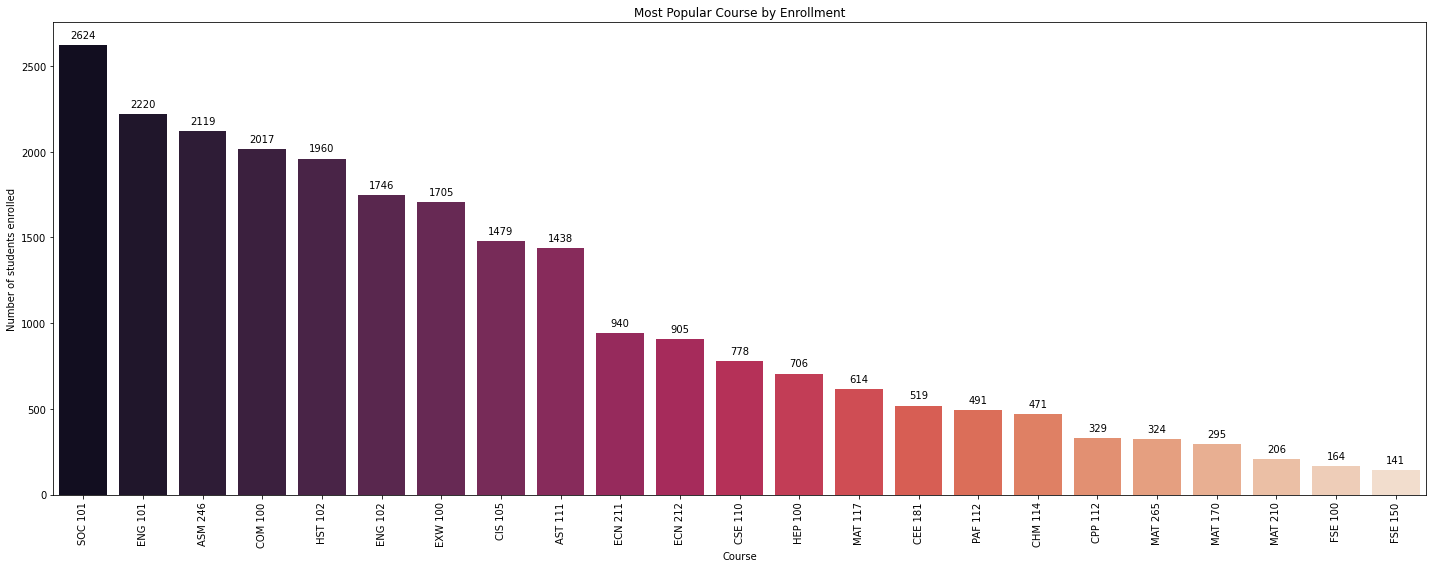

In [9]:
value_counts = df['Course Prefix'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Course Prefix', data=df, order=value_counts.index, palette='rocket')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set the labels and title
plt.xlabel('Course')
plt.ylabel('Number of students enrolled')
plt.title('Most Popular Course by Enrollment')

# adjust xticks
plt.xticks(rotation=90)
plt.tight_layout()

We can see the top couses taken by students
- SOC 101 is the most taken course
- FSE 150 is the least taken couse

## Enrollment & course offering by term



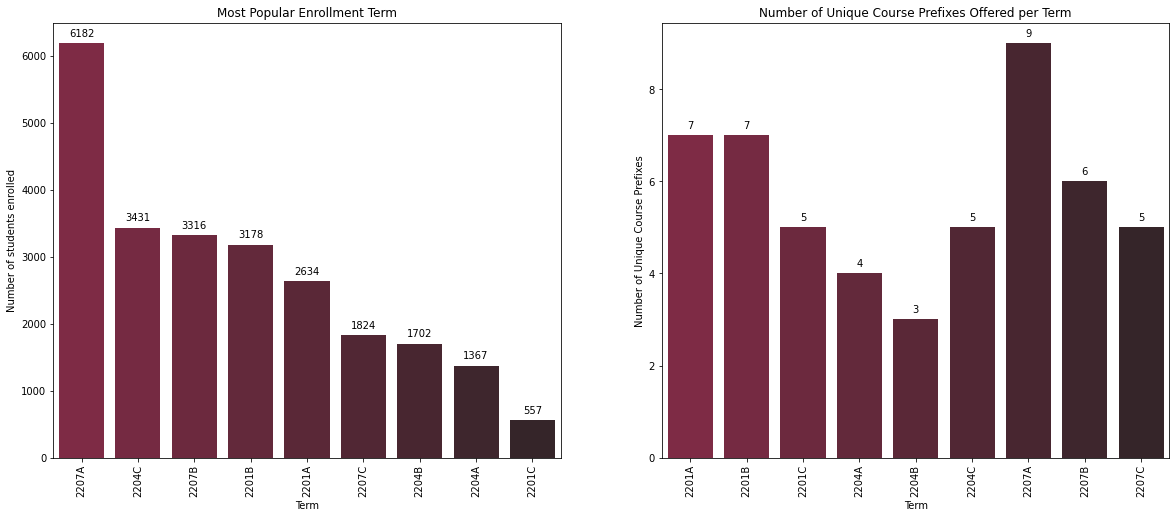

In [11]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2)

# First subplot: countplot of enrollment by term
value_counts = df['Term'].value_counts().sort_values(ascending=False)
sns.countplot(x='Term', data=df, order=value_counts.index, palette=dark_palette, ax=axs[0])
axs[0].set_xlabel('Term')
axs[0].set_ylabel('Number of students enrolled')
axs[0].set_title('Most Popular Enrollment Term')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Second subplot: bar chart of courses per term
courses_per_term = df.groupby('Term')['Course Prefix'].nunique().reset_index()
sns.barplot(x='Term', y='Course Prefix', data=courses_per_term, palette=dark_palette, ax=axs[1])
axs[1].set_xlabel('Term')
axs[1].set_ylabel('Number of Unique Course Prefixes')
axs[1].set_title('Number of Unique Course Prefixes Offered per Term')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Patterns in the enrollment behavior of students

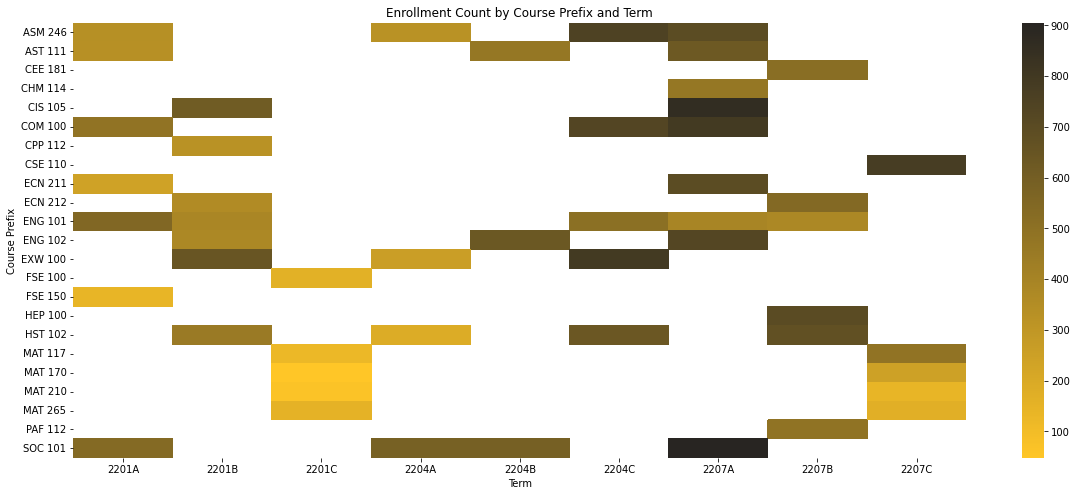

In [12]:
dark_palette=sns.dark_palette(color_2, 500, reverse=True)

# Group the data by course prefix and term
grouped = df.groupby(['Course Prefix', 'Term'])

# Calculate the enrollment count for each course prefix and term
enrollment_count = grouped['Course Enrollment'].count().reset_index()

# Create a heatmap of the enrollment count by course prefix and term
sns.heatmap(enrollment_count.pivot(index='Course Prefix', columns='Term', values='Course Enrollment'), cmap=dark_palette)

# Set the plot title and axis labels
plt.title('Enrollment Count by Course Prefix and Term')
plt.xlabel('Term')
plt.ylabel('Course Prefix')

# Show the plot
plt.show()

## Distribution of Grades based on enrollment mode


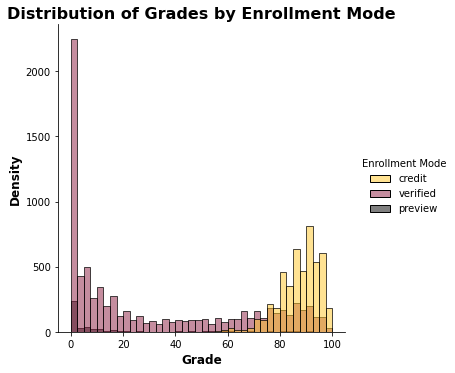

In [13]:
# Create a distribution plot of grades based on enrollment mode
sns.displot(df, x="Grade", hue="Enrollment Mode", kde=False, stat='count', palette=['#FFC627','#8C1D40', '#000000'], bins=40)

# Set the title and axis labels
plt.title('Distribution of Grades by Enrollment Mode', fontsize=16, fontweight='bold')
plt.xlabel('Grade', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

plt.show()

In [14]:
# Filter the data to include only courses where the grade is less than 40
filtered_df = df[df['Grade'] < 40]

# Get the value counts of the course prefixes and enrollment modes, and sort in descending order
course_counts = filtered_df.groupby(['Course Prefix', 'Enrollment Mode'])['Student'].count().reset_index().sort_values(['Student', 'Course Prefix'], ascending=[False, True])

# Get the top 5 courses with the lowest grades for each enrollment mode
enrollment_modes = course_counts['Enrollment Mode'].unique()
for mode in enrollment_modes:
    print(f"\nTop 5 courses with grades less than 40 for {mode} enrollment:\n")
    top_courses = course_counts[course_counts['Enrollment Mode'] == mode].head(5)
    for course, mode, count in top_courses[['Course Prefix', 'Enrollment Mode', 'Student']].itertuples(index=False):
        print(f"{course} ({mode}): {count} students")


Top 5 courses with grades less than 40 for verified enrollment:

COM 100 (verified): 504 students
ENG 101 (verified): 486 students
AST 111 (verified): 464 students
SOC 101 (verified): 445 students
ENG 102 (verified): 429 students

Top 5 courses with grades less than 40 for preview enrollment:

SOC 101 (preview): 47 students
HST 102 (preview): 34 students
ENG 101 (preview): 29 students
EXW 100 (preview): 29 students
AST 111 (preview): 27 students


## Difficulty level of Courses

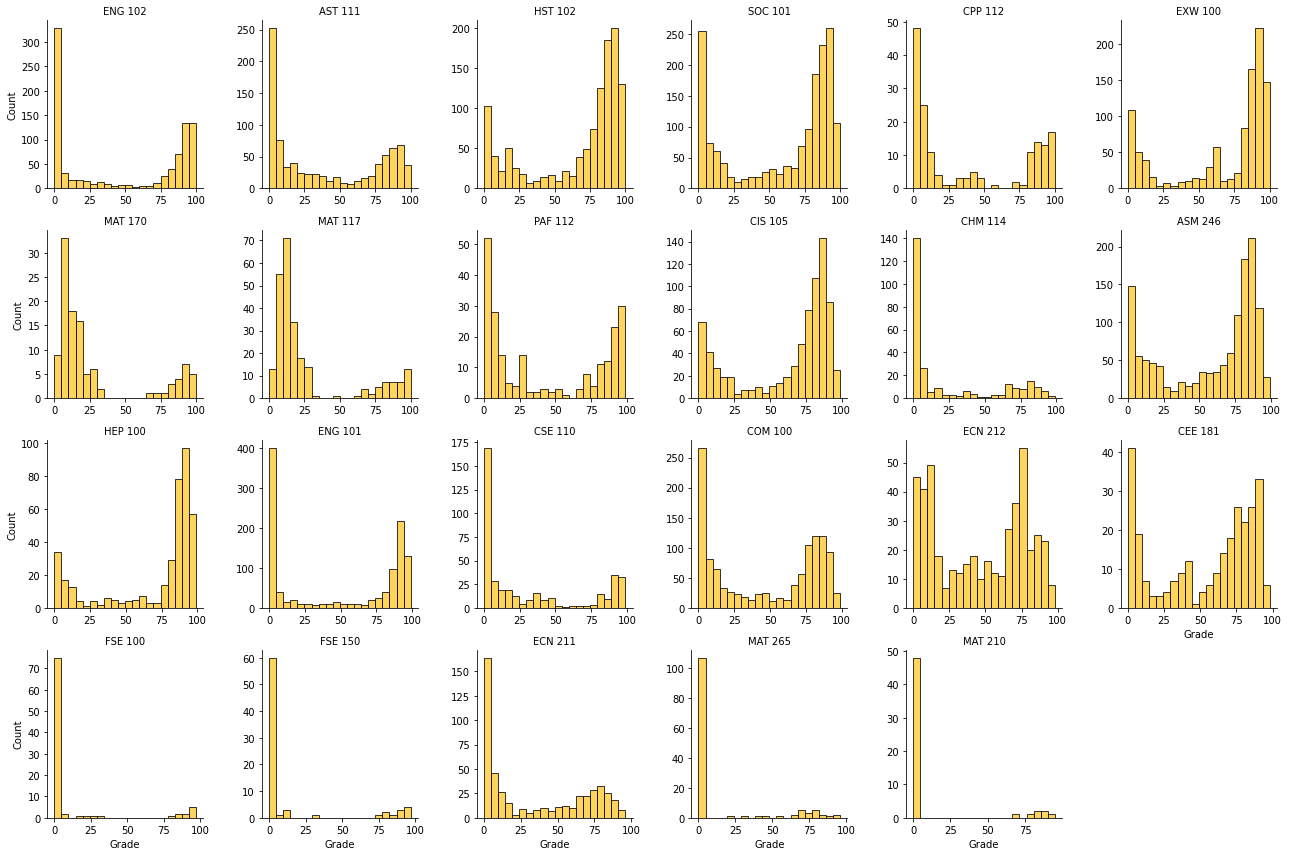

In [15]:
# Filter out rows with missing data in the 'Grade' column
df = df[df['Grade'].notna()]

# Create a FacetGrid object for the histograms
ax = sns.FacetGrid(data=df, col='Course Prefix', col_wrap=6, sharex=False, sharey=False, palette='Rd')

# Map a histogram to each course prefix
ax.map(sns.histplot, 'Grade', bins=20)

# Set the axis labels and plot titles
ax.set_axis_labels('Grade', 'Count')
ax.set_titles('{col_name}')

# Show the plot
plt.show()

## Relation between credit converted & grades

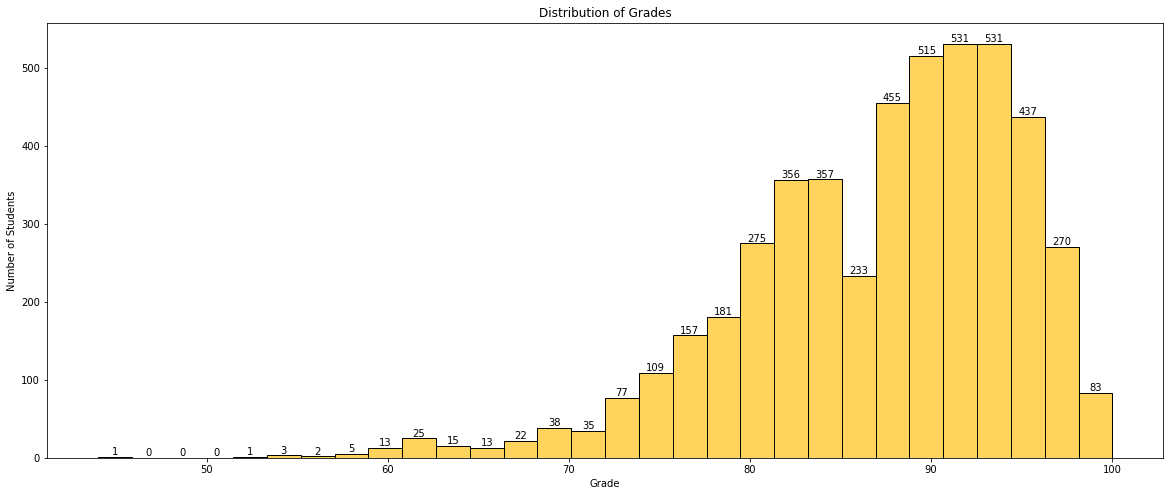

In [16]:
# Filter rows where both Credit Converted and Grade are not null
df_filtered = df[(~df['Credit Converted'].isnull()) & (~df['Grade'].isnull())]

# Create histogram to show distribution of grades
sns.histplot(data=df_filtered, x='Grade', bins=30, color='#FFC627')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Distribution of Grades')

# Add text annotations to the bars
ax = plt.gca()
for rect in ax.patches:
    # Get the x and y coordinates of the bottom left corner of the bar
    x = rect.get_x()
    y = rect.get_y()
    # Get the width and height of the bar
    width = rect.get_width()
    height = rect.get_height()
    # Add the count of students to the top of the bar
    ax.text(x + width / 2, y + height, int(height), ha='center', va='bottom', color='black')

plt.show()

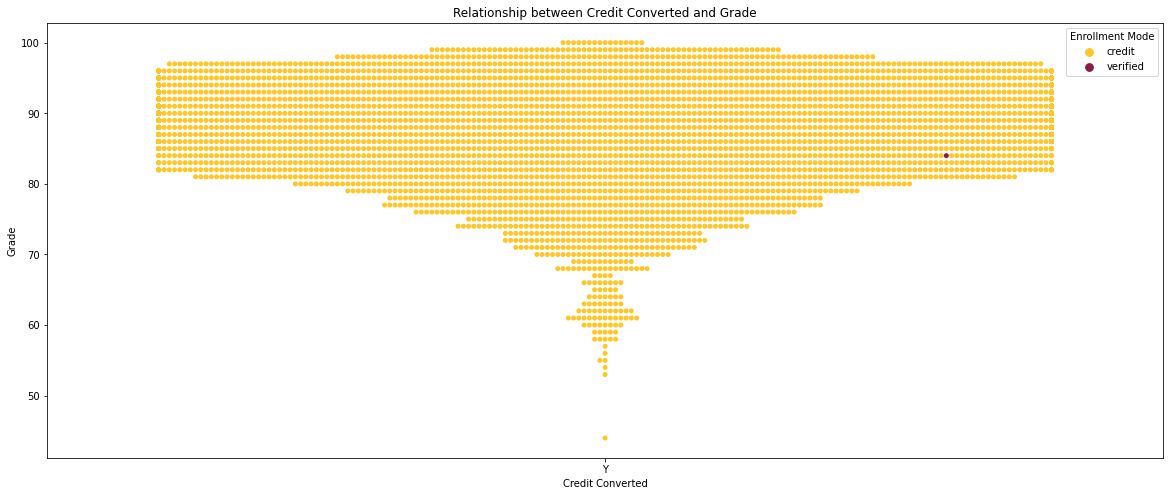

In [17]:
# Create swarmplot to show relationship between Credit Converted and Grade, with hue for Enrollment Mode
sns.swarmplot(x='Credit Converted', y='Grade', hue='Enrollment Mode', data=df_filtered)

# Set axis labels and title for swarmplot
plt.xlabel('Credit Converted')
plt.ylabel('Grade')
plt.title('Relationship between Credit Converted and Grade')

plt.show()

## How many students enrolled in multiple courses

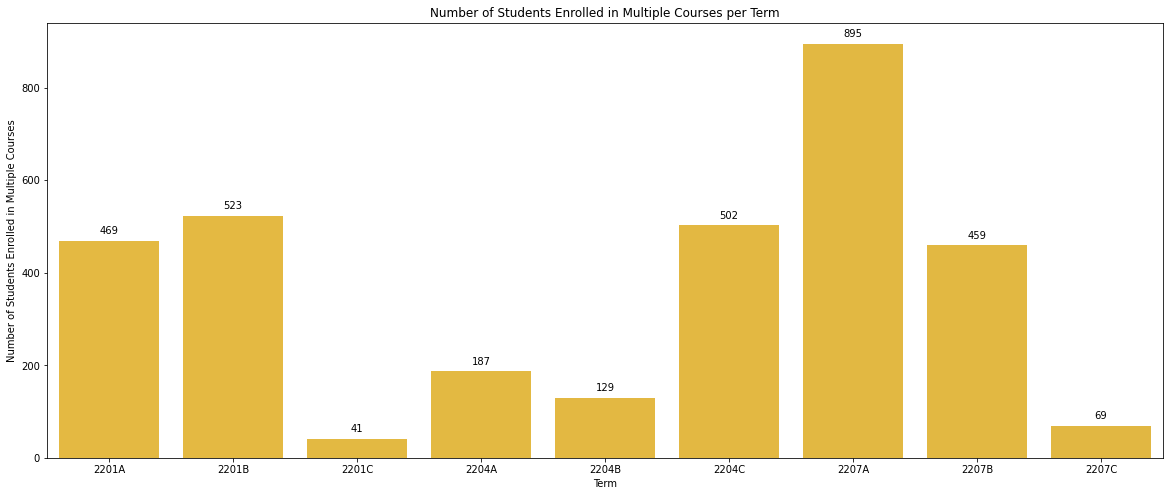

In [18]:
# Count the number of unique courses per student per term
courses_per_student_per_term = df.groupby(['Term', 'Student'])['Course Prefix'].nunique()

# Count the number of students who are enrolled in more than one course per term
multi_course_students_per_term = (courses_per_student_per_term > 1).groupby('Term').sum()

# Plot the number of students who are enrolled in more than one course per term
ax=sns.barplot(x=multi_course_students_per_term.index, y=multi_course_students_per_term.values, palette=dark_palette)

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set axis labels and title
plt.xlabel('Term')
plt.ylabel('Number of Students Enrolled in Multiple Courses')
plt.title('Number of Students Enrolled in Multiple Courses per Term')

plt.show()

In [19]:
# Group the data by Term and Student, and find the set of unique course prefixes for each group
courses_per_student_per_term = df.groupby(['Term', 'Student'])['Course Prefix'].apply(set)

# Filter out groups with less than 2 unique courses
multiple_courses_per_student_per_term = courses_per_student_per_term[courses_per_student_per_term.apply(len) >= 2]

# Convert the sets to tuples
multiple_courses_per_student_per_term = multiple_courses_per_student_per_term.apply(tuple)

# Group the data by the unique course combinations and count the number of students
course_combinations = multiple_courses_per_student_per_term.groupby(multiple_courses_per_student_per_term).size().sort_values(ascending=False)

# Print the top course combinations
print(course_combinations.head(10))

Course Prefix
(COM 100, SOC 101)    145
(ASM 246, COM 100)    134
(ASM 246, SOC 101)    122
(AST 111, SOC 101)    108
(EXW 100, HST 102)     97
(ASM 246, HST 102)     75
(ENG 101, SOC 101)     72
(ASM 246, EXW 100)     71
(HST 102, HEP 100)     64
(EXW 100, ENG 101)     63
Name: Course Prefix, dtype: int64


## Analysis of Credits, Enrollment Mode & Partners

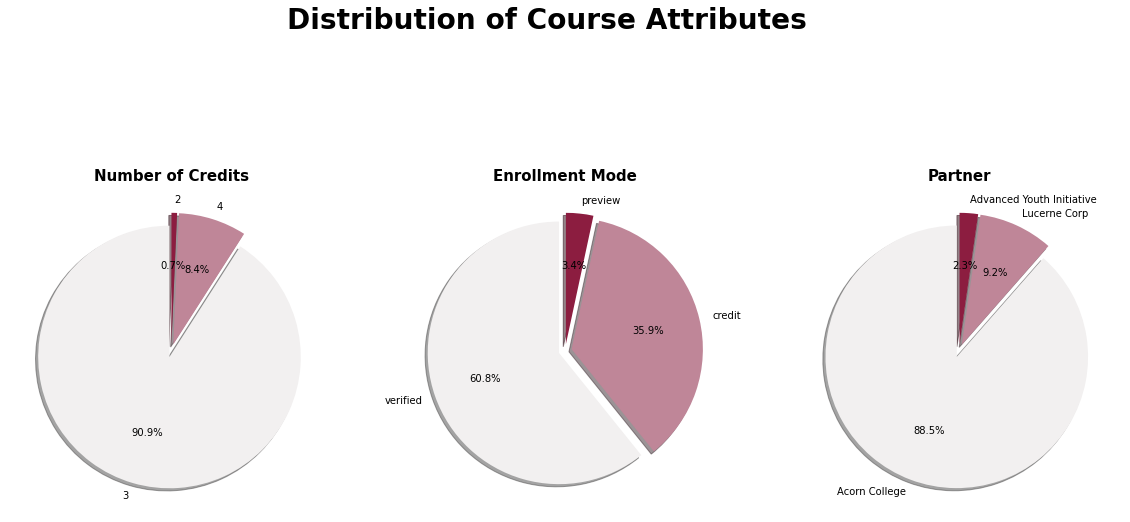

In [20]:
# Set color scheme
color = '#8C1D40'
light_colors = sns.light_palette(color, 3)

# Set common title for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Distribution of Course Attributes', fontsize=28, fontweight='bold')

# Distribution of Number of Credits
value_counts = df['Number of Credits'].value_counts().sort_values(ascending=False)
explode = [0.05] * len(value_counts)
axes[0].pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True, colors=light_colors, explode=explode)
axes[0].set_title('Number of Credits', fontsize=15, fontweight='bold')
for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
  label.set_fontsize(20)
  label.set_fontweight('bold')

# Distribution of Enrollment Mode
value_counts = df['Enrollment Mode'].value_counts().sort_values(ascending=False)
explode = [0.05] * len(value_counts)
axes[1].pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True, colors=light_colors, explode=explode)
axes[1].set_title('Enrollment Mode', fontsize=15, fontweight='bold')
for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
  label.set_fontsize(20)
  label.set_fontweight('extra bold')
  label.set_color('white')

# Distribution of Partners
value_counts = df['Partner'].value_counts().sort_values(ascending=False)
explode = [0.05] * len(value_counts)
axes[2].pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True, colors=light_colors, explode=explode)
axes[2].set_title('Partner', fontsize=15, fontweight='bold')
for label in axes[2].get_xticklabels() + axes[2].get_yticklabels():
  label.set_fontsize(20)
  label.set_fontweight('bold')

plt.show()


## Distribution of Partners & Student Enrollment

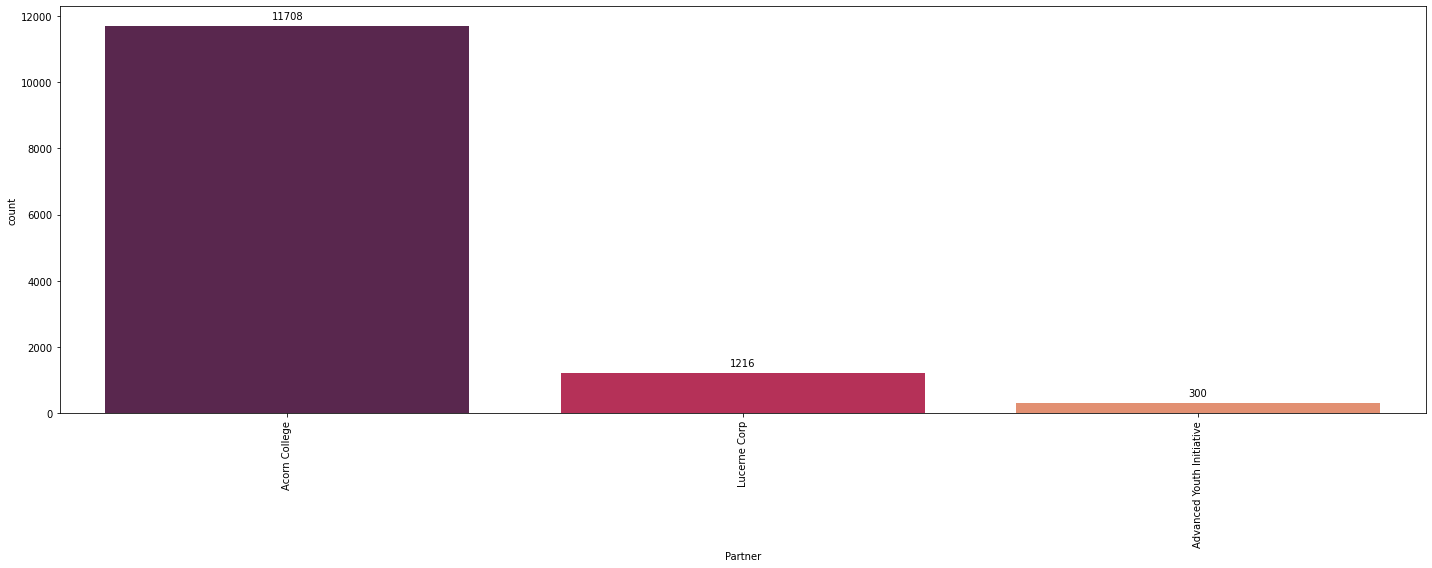

In [21]:
value_counts = df['Partner'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='Partner', data=df, order=value_counts.index, palette='rocket')

# add count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# adjust xticks
plt.xticks(rotation=90)
plt.tight_layout()

# Distribution of Final Grades by enrollment mode

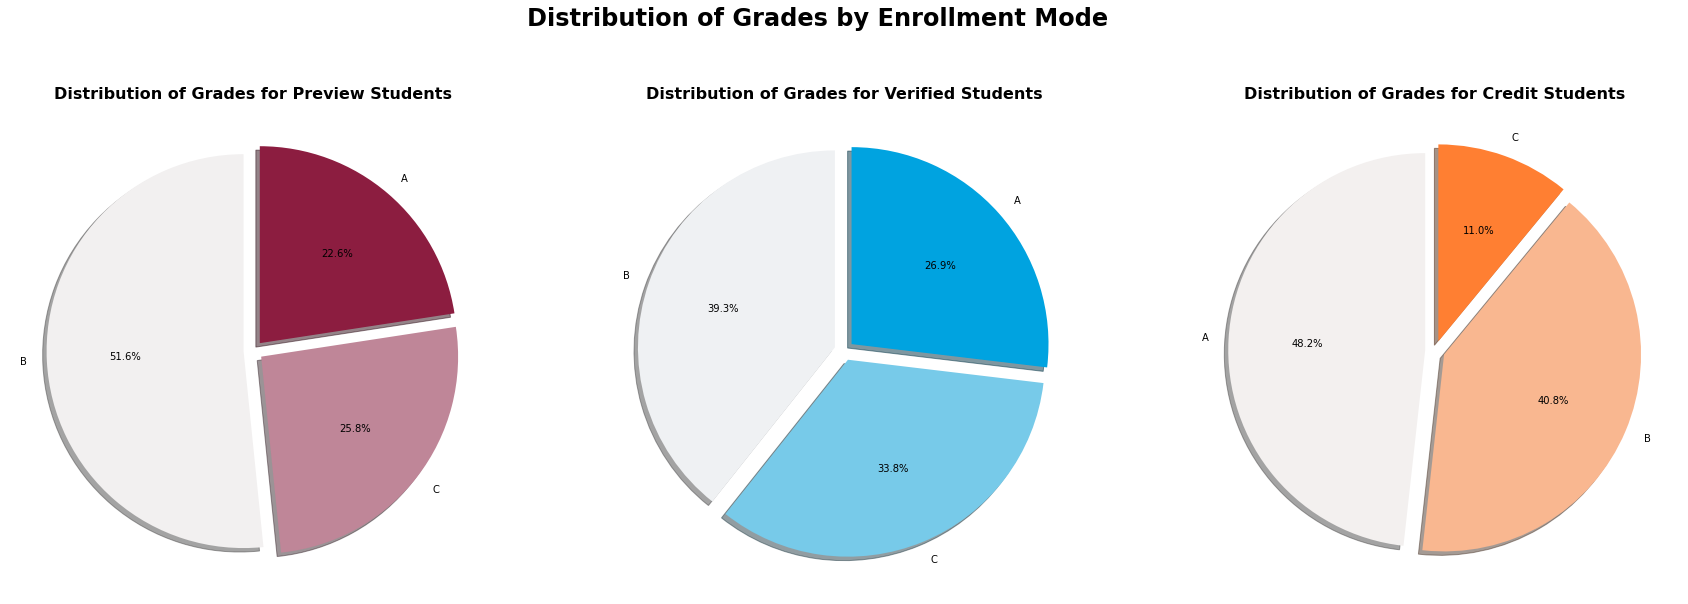

In [22]:
# Set colors for the pie charts
colors = ['#8C1D40', '#00A3E0', '#FF7F32']

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Define a function to create a pie chart for a given enrollment mode and subplot
def create_pie_chart(enrollment_mode, color, ax, explode):
    # Filter data by enrollment mode
    x = df[df['Enrollment Mode']==enrollment_mode]
    light_colors = sns.light_palette(color, 3)

    value_counts = x['Final Grade'].value_counts().sort_values(ascending=False)

    # Create pie chart with explosion
    ax.pie(value_counts.values, labels=value_counts.index, autopct='\n{:.1f}%\n'.format, startangle=90, shadow=True, colors=light_colors, explode=explode)

    # Add title and legend
    ax.set_title(f'Distribution of Grades for {enrollment_mode.capitalize()} Students', fontsize=16, fontweight='bold')

    # Set font size and weight of labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(30)
        label.set_fontweight('bold')

# Loop through enrollment modes and call the function for each
explode = [0.05, 0.05, 0.05]
for i, mode in enumerate(['preview', 'verified', 'credit']):
    create_pie_chart(mode, colors[i], axs[i], explode)

# Add common title for the chart
fig.suptitle('Distribution of Grades by Enrollment Mode', fontsize=24, fontweight='bold')

# Show the plot
plt.show()

# Study Outliers in in grades by enrollment mode

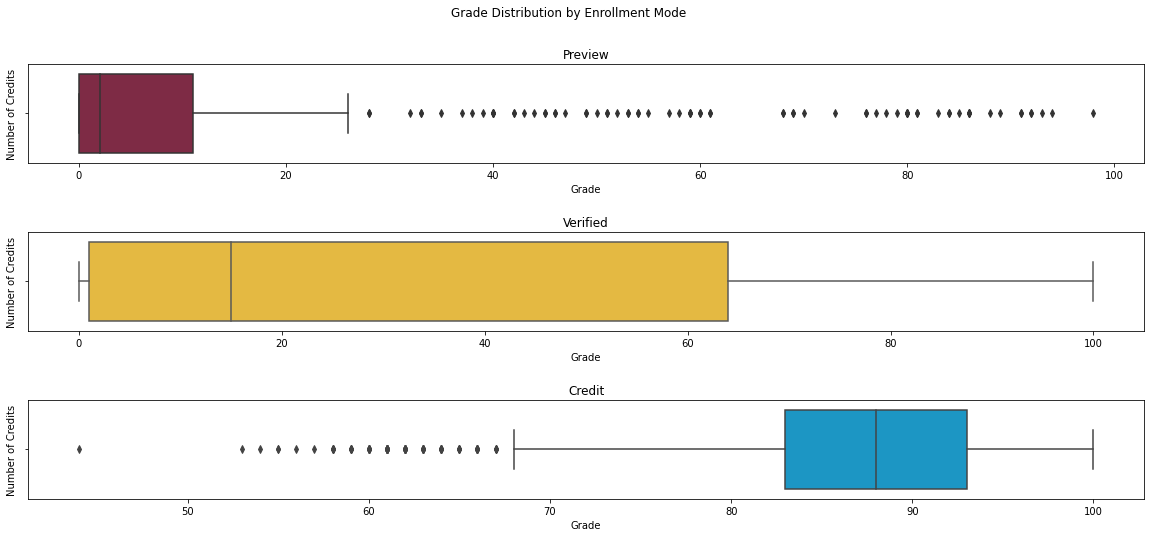

In [23]:
# Create a figure with three subplots arranged vertically
fig, axs = plt.subplots(nrows=3)

# Filter rows for each enrollment mode and create a boxplot of the grade distribution for each
preview_data = df[df['Enrollment Mode']=='preview'][['Number of Credits', 'Grade']].dropna()
sns.boxplot(data=preview_data, x='Grade', color='#8C1D40', ax=axs[0])
axs[0].set_title('Preview')

verified_data = df[df['Enrollment Mode']=='verified'][['Number of Credits', 'Grade']].dropna()
sns.boxplot(data=verified_data, x='Grade', color='#FFC627', ax=axs[1])
axs[1].set_title('Verified')

credit_data = df[df['Enrollment Mode']=='credit'][['Number of Credits', 'Grade']].dropna()
sns.boxplot(data=credit_data, x='Grade', color='#00A3E0', ax=axs[2])
axs[2].set_title('Credit')

# Set the x- and y-axis labels for each subplot
for ax in axs:
    ax.set_xlabel('Grade')
    ax.set_ylabel('Number of Credits')

# Add some space between subplots
fig.subplots_adjust(hspace=0.7)

# Set the title for the overall figure
fig.suptitle('Grade Distribution by Enrollment Mode')

# Show the plot
plt.show()


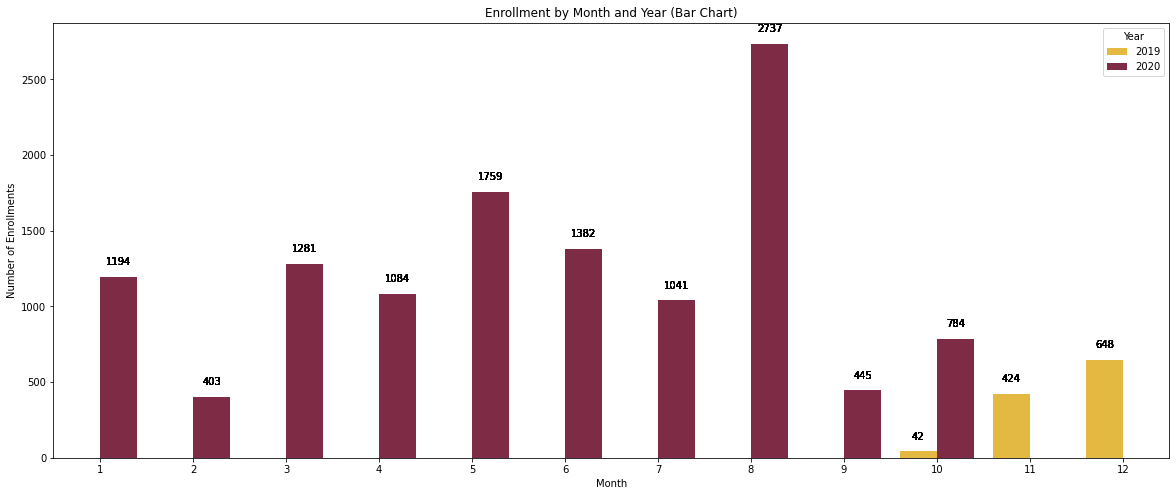

In [24]:
# Convert the Enrollment Date column to datetime format and add a month column
df['Enrollment Date'] = pd.to_datetime(df['Enrollment Date'], format='%m-%d-%y')
df['Month'] = df['Enrollment Date'].dt.month
df['Year'] = df['Enrollment Date'].dt.year

# Group by year and month and count the number of enrollments
enrollment_counts = df.groupby(['Year', 'Month'])['Student'].count().reset_index()

# Plot the enrollment counts as a bar chart and a line chart
fig, ax = plt.subplots()
ax=sns.barplot(x='Month', y='Student', hue='Year', data=enrollment_counts)

# Add count values to the bars
def annotateBars(row, ax=ax):
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
enrollment_counts.apply(annotateBars, ax=ax, axis=1)

# Set axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Enrollments')
ax.set_title('Enrollment by Month and Year (Bar Chart)')

plt.show()

# Do students tend to perform better or worse in courses that start or end at certain times of the year 

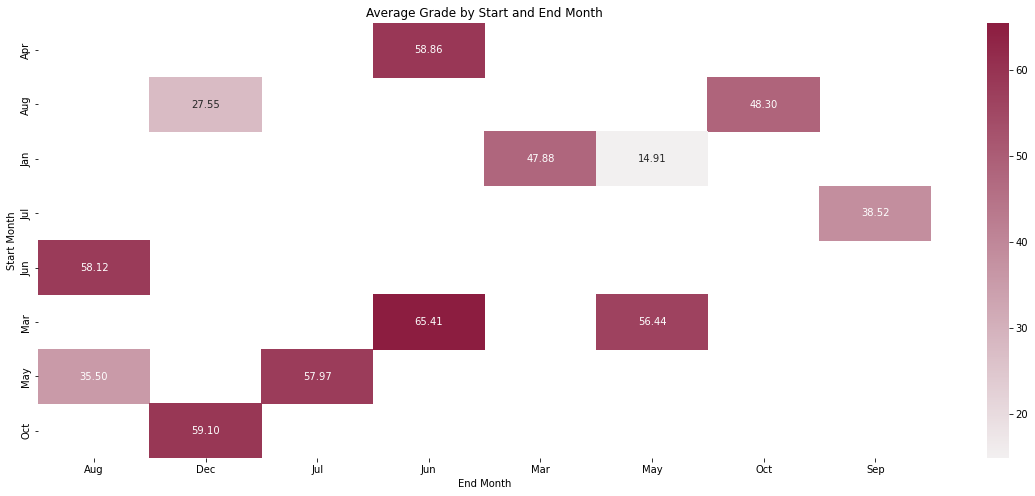

In [25]:
color='#8C1D40'

light_palette=sns.light_palette(color, 500, reverse=False)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter out rows with missing data in the 'Grade' column
df = df[df['Grade'].notna()]

# Create a new column with the month of the course start date
df['Start Month'] = df['Course Start Date'].dt.month.map(lambda x: month_names[x-1])

# Create a new column with the month of the course end date
df['End Month'] = df['Course End Date'].dt.month.map(lambda x: month_names[x-1])

# Group the data by start and end month, and calculate the average grade for each group
grouped = df.groupby(['Start Month', 'End Month'])
avg_grade = grouped['Grade'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = avg_grade.pivot('Start Month', 'End Month', 'Grade')

# Create the heatmap using seaborn
sns.heatmap(heatmap_data, cmap=light_palette, annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Average Grade by Start and End Month')
plt.xlabel('End Month')
plt.ylabel('Start Month')

# Show the plot
plt.show()

# Grade & Enrollment data anlysis by Enrollment Mode, Credits & Partner

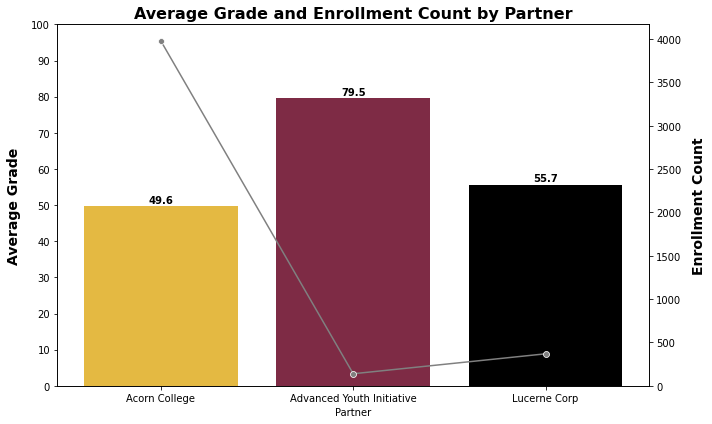

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average grade and count of students enrolled for each partner/instructor
partner_stats = df.groupby('Partner').agg({'Grade': 'mean', 'Student': 'nunique'}).reset_index()
partner_stats.columns = ['Partner', 'Average Grade', 'Enrollment Count']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Partner', y='Average Grade', data=partner_stats, ax=ax1)

# Set y-axis labels and ticks
ax1.set_ylabel('Average Grade', fontsize=14, fontweight='extra bold', labelpad=10, color='black')
ax1.set_yticks(range(0, 101, 10))
ax1.tick_params(axis='y', labelcolor='black')

# Add annotations to the bars
for i, v in enumerate(partner_stats['Average Grade']):
    ax1.text(i, v+1, str(round(v, 1)), color='black', fontweight='extra bold', ha='center')


# Add a secondary y-axis for the enrollment count
ax2 = ax1.twinx()
sns.lineplot(x='Partner', y='Enrollment Count', data=partner_stats, ax=ax2, sort=False, color='grey', marker='o')
ax2.set_ylabel('Enrollment Count', fontsize=14, fontweight='extra bold', labelpad=10, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(False)
ax2.set_ylim([0, ax2.get_ylim()[1]])

# Set x-axis labels and ticks
plt.xticks(rotation=90, fontsize=12, fontweight='extra bold', color='black')

# Add a title and adjust layout
plt.title('Average Grade and Enrollment Count by Partner', fontsize=16, fontweight='extra bold', color='black')
plt.tight_layout()

# Show the plot
plt.show()


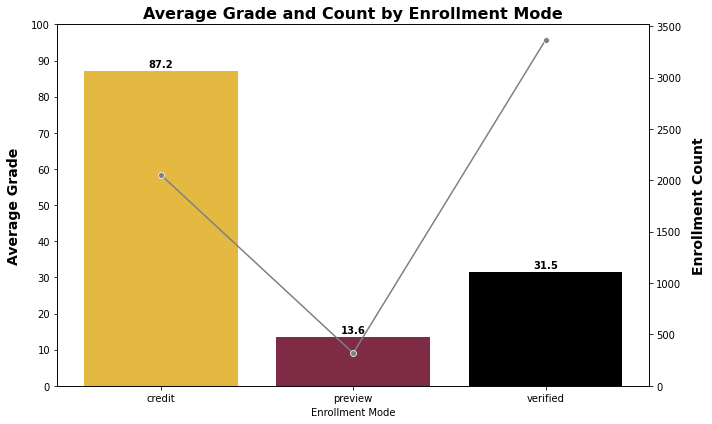

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average grade and count of students enrolled for each partner/instructor
partner_stats = df.groupby('Enrollment Mode').agg({'Grade': 'mean', 'Student': 'nunique'}).reset_index()
partner_stats.columns = ['Enrollment Mode', 'Average Grade', 'Enrollment Count']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Enrollment Mode', y='Average Grade', data=partner_stats, ax=ax1)

# Set y-axis labels and ticks
ax1.set_ylabel('Average Grade', fontsize=14, fontweight='extra bold', labelpad=10, color='black')
ax1.set_yticks(range(0, 101, 10))
ax1.tick_params(axis='y', labelcolor='black')

# Add annotations to the bars
for i, v in enumerate(partner_stats['Average Grade']):
    ax1.text(i, v+1, str(round(v, 1)), color='black', fontweight='extra bold', ha='center')


# Add a secondary y-axis for the enrollment count
ax2 = ax1.twinx()
sns.lineplot(x='Enrollment Mode', y='Enrollment Count', data=partner_stats, ax=ax2, sort=False, color='grey', marker='o')
ax2.set_ylabel('Enrollment Count', fontsize=14, fontweight='extra bold', labelpad=10, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(False)
ax2.set_ylim([0, ax2.get_ylim()[1]])

# Set x-axis labels and ticks
plt.xticks(rotation=90, fontsize=12, fontweight='extra bold', color='black')

# Add a title and adjust layout
plt.title('Average Grade and Count by Enrollment Mode', fontsize=16, fontweight='extra bold', color='black')
plt.tight_layout()

# Show the plot
plt.show()


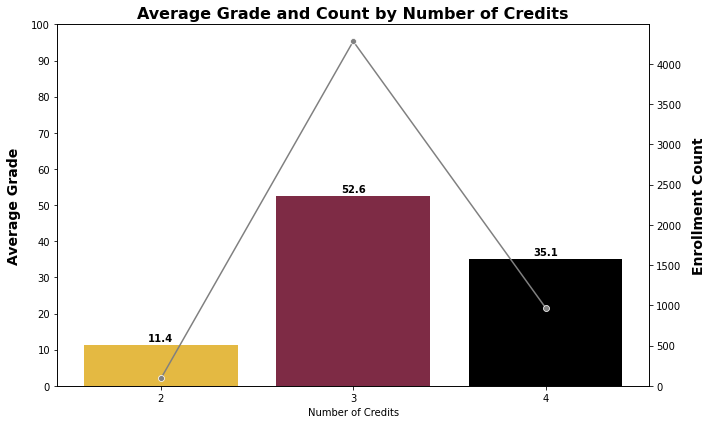

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average grade and count of students enrolled for each partner/instructor
partner_stats = df.groupby('Number of Credits').agg({'Grade': 'mean', 'Student': 'nunique'}).reset_index()
partner_stats.columns = ['Number of Credits', 'Average Grade', 'Enrollment Count']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Number of Credits', y='Average Grade', data=partner_stats, ax=ax1)

# Set y-axis labels and ticks
ax1.set_ylabel('Average Grade', fontsize=14, fontweight='extra bold', labelpad=10, color='black')
ax1.set_yticks(range(0, 101, 10))
ax1.tick_params(axis='y', labelcolor='black')

# Add annotations to the bars
for i, v in enumerate(partner_stats['Average Grade']):
    ax1.text(i, v+1, str(round(v, 1)), color='black', fontweight='extra bold', ha='center')


# Add a secondary y-axis for the enrollment count
ax2 = ax1.twinx()
sns.lineplot(x='Number of Credits', y='Enrollment Count', data=partner_stats, ax=ax2, sort=False, color='grey', marker='o')
ax2.set_ylabel('Enrollment Count', fontsize=14, fontweight='extra bold', labelpad=10, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(False)
ax2.set_ylim([0, ax2.get_ylim()[1]])

# Set x-axis labels and ticks
plt.xticks(rotation=90, fontsize=12, fontweight='extra bold', color='black')

# Add a title and adjust layout
plt.title('Average Grade and Count by Number of Credits', fontsize=16, fontweight='extra bold', color='black')
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
partner_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number of Credits  3 non-null      object 
 1   Average Grade      3 non-null      float64
 2   Enrollment Count   3 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


# Course Length v/s Grade

<Figure size 720x432 with 0 Axes>

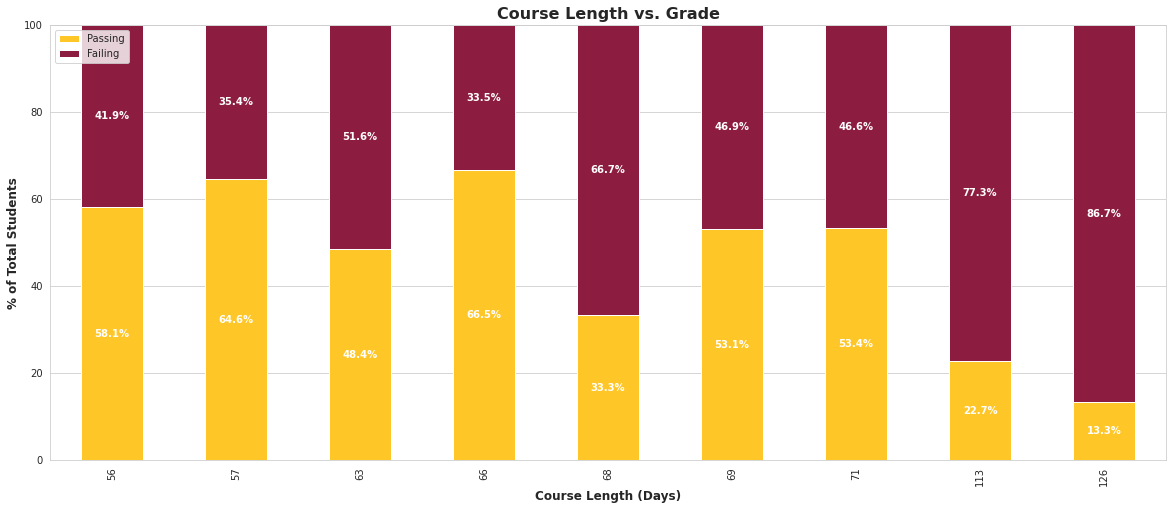

In [30]:
# Define passing and failing grades
passing_grade = 50
failing_grade = 25

# Calculate course length in days
df['Course Start Date'] = pd.to_datetime(df['Course Start Date'])
df['Course End Date'] = pd.to_datetime(df['Course End Date'])
df['Course Length'] = (df['Course End Date'] - df['Course Start Date']).dt.days

# Calculate student success based on grade threshold
df['Student Success'] = df['Grade'] >= passing_grade

# Group the data by course length and student success
grouped = df.groupby(['Course Length', 'Student Success']).size().reset_index(name='counts')

# Pivot the data to create a table with course length as rows, success as columns, and counts as values
pivot_table = grouped.pivot(index='Course Length', columns='Student Success', values='counts')
pivot_table = pivot_table.fillna(0)

# Calculate the total count of students for each course length
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the percentage of passing students for each course length
pivot_table['Passing %'] = pivot_table[True] / pivot_table['Total'] * 100

# Calculate the percentage of failing students for each course length
pivot_table['Failing %'] = pivot_table[False] / pivot_table['Total'] * 100

# Create a stacked bar chart
sns.set_style("whitegrid")
sns.set_palette("bright")
plt.figure(figsize=(10,6))
ax = pivot_table[['Passing %', 'Failing %']].plot(kind='bar', stacked=True, color=['#FFC627','#8C1D40'])
plt.title('Course Length vs. Grade', fontsize=16, fontweight='bold')
plt.xlabel('Course Length (Days)', fontsize=12, fontweight='bold')
plt.ylabel('% of Total Students', fontsize=12, fontweight='bold')
plt.ylim(0, 100)

for i, r in enumerate(pivot_table[['Passing %', 'Failing %']].iterrows()):
    row_vals = r[1].values
    total = sum(row_vals)
    for j, val in enumerate(row_vals):
        if val > 0:
            ax.text(i, val/2 if j==0 else total - val/2, f'{val/total*100:.1f}%', ha='center', va='center', color='white', fontweight='bold')

plt.legend(['Passing', 'Failing'], loc='upper left')
plt.show()


In [31]:
df[df['Course Length'] > 100]['Course Prefix'].unique()

array(['MAT 170', 'MAT 117', 'CSE 110', 'FSE 100', 'MAT 265', 'MAT 210'],
      dtype=object)

# Median Grades per Term

In [32]:
# Group the data by term and calculate the average enrollment and grade for each term
term_stats = df.groupby("Term").agg({"Grade": "median"})

# Find the term with the highest median grade
max_grade_term = term_stats["Grade"].idxmax()

print(f"The term with the highest median grade is {max_grade_term}")

The term with the highest median grade is 2204A


In [33]:
term_stats

,Grade
Term,
2201A,63.0
2201B,73.0
2201C,0.0
2204A,79.0
2204B,39.0
2204C,79.0
2207A,60.0
2207B,76.5
2207C,10.0


The term with the highest median grade is 2204A


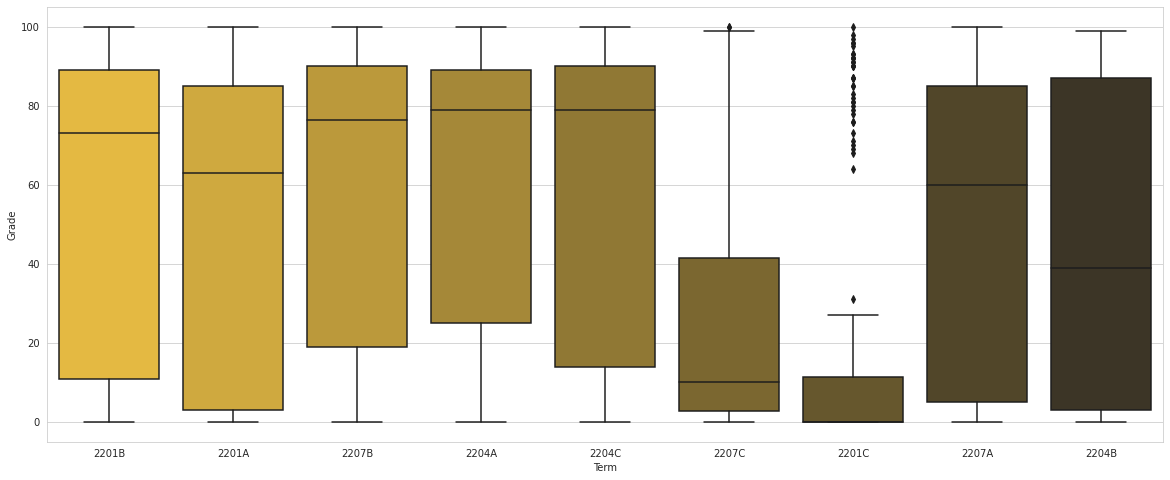

In [34]:
# Group the data by term and calculate the median enrollment and grade for each term
term_stats = df.groupby("Term").agg({"Grade": "median"})

# Find the term with the highest median grade
max_grade_term = term_stats["Grade"].idxmax()

print(f"The term with the highest median grade is {max_grade_term}")

# Create a boxplot of grade by term
sns.boxplot(x="Term", y="Grade", data=df, palette=dark_palette_2)

# Feature importance wrt Grades

Feature ranking:
1. Enrollment Mode (0.841023)
2. Course Prefix (0.096057)
3. Term (0.050913)
4. Partner (0.012008)


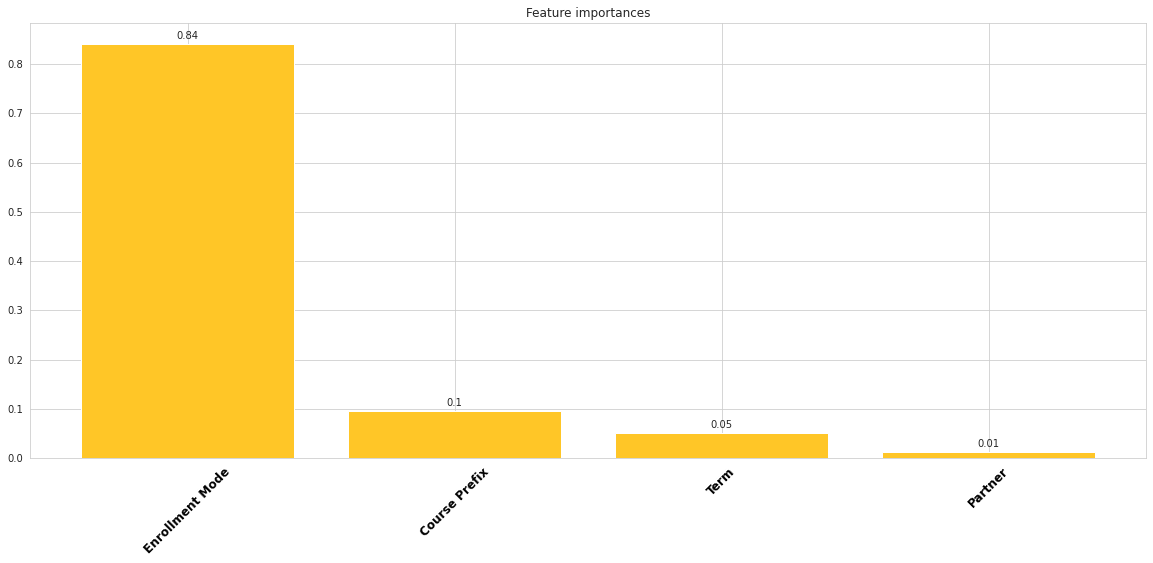

In [47]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Select relevant columns
df_ml = df[["Grade", "Enrollment Mode", "Partner", "Course Prefix", "Term"]]

# Drop rows with missing values
df_ml = df_ml.dropna()

# Encode categorical variables as integers
label_encoder = LabelEncoder()
df_ml["Enrollment Mode"] = label_encoder.fit_transform(df_ml["Enrollment Mode"])
df_ml["Partner"] = label_encoder.fit_transform(df_ml["Partner"])
df_ml["Course Prefix"] = label_encoder.fit_transform(df_ml["Course Prefix"])
df_ml["Term"] = label_encoder.fit_transform(df_ml["Term"])

# Split data into features and target variable
X = df_ml.drop("Grade", axis=1)
y = df_ml["Grade"].astype(float)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot feature importances
fig, ax = plt.subplots()
ax.set_title("Feature importances")
ax.bar(X.columns[indices], importances[indices], color=color_2, align="center")
plt.xticks(rotation=45, fontsize=12, fontweight='extra bold', color='black')

# Add annotations to the bars
for i, v in enumerate(importances[indices]):
    ax.text(i, v+0.01, str(round(v,2)), ha='center')

plt.show()